# Clasificación II: Cancer de Seno
## _Paula Lorena López_ & _Sara Julieth Zuleta_

Las aplicaciones del aprendizaje automatico de máquinas en el campo médico es una de las áreas de trabajo del profesor Alexander. Por esta razón el no podia dejar a un lado utilizar datos de este campo para evaluar el conocimiento de los alumnos en Clasificación lineal. Para este problema el profesor usara la base de datos sobre Cancer de Seno. Está base de datos esta descrita en el UCI repository y se puede desargar directamente de los databease que tiene la libreria scikit-learn de python. Está base de dato tiene un conjunto de datos extraidos de una imagen de seno, estos datos describen las caracteristicas de las masas que pueden ser tumores benignos o malignos. El profesor Alexander quiere que ustedes utilicen sus conocimientos en Machine Learning para diseñar un clasificador que sea capaz de predecir si un tumor de seno es maligno o no, basado en la información porporcionada en la base de datos.

Para este proposito el Profesor Alexander dividio el problema en las siguientes tareas:

1. Cargen los datos *breast_cancer* de la librería scikit learn.



In [1]:
import sklearn
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, linear_model, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline




In [2]:
data = datasets.load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


2. Implementen un clasificador usando KNN. Determine una forma de evaluar el rendimiento de este clasificador para diferentes valores de K.


In [3]:
x = data.data
print(len(x))
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x,y)
#valores random para el test y para el train

569


In [4]:
int_rango = range(1, 20)
scores = []
for k in int_rango:
    i = 0
    neig = KNeighborsClassifier(n_neighbors = k)
    neig.fit(x_train, y_train)
    y_pred = neig.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
        
        
print('Precisión de K-NN en training: {:.2f}'
 .format(neig.score(x_train, y_train)))
print('Precisión de K-NN en test: {:.2f}'
 .format(neig.score(x_test, y_test)))




Precisión de K-NN en training: 0.93
Precisión de K-NN en test: 0.95


([<matplotlib.axis.XTick at 0x22403fb9248>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

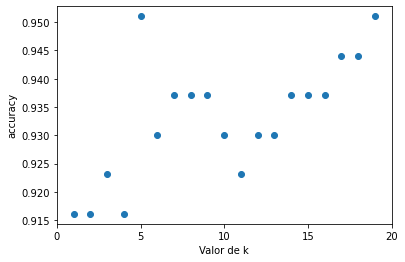

In [5]:
plt.figure()
plt.xlabel('Valor de k')
plt.ylabel('accuracy')
plt.scatter(int_rango, scores)
plt.xticks([0,5,10,15,20])

El valor de k está dado por la gráfica anterior. El valor de k es el número en donde la precisión es más alta.

3. Implemente un clasificador utilizando regresión logistica. Busque una manera de poder visualizar esos datos de tal forma que se puedan dibujar las regiones de decisión en una grafica 2D.



In [6]:
sc = StandardScaler() #Estandarizamos 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clasificacion = LogisticRegression(random_state=0,solver='lbfgs', max_iter=10000)
clasificacion.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [7]:
pred = clasificacion.predict(x_test)

accuracy_score(y_test, pred)
print("El accuracy del test es: {:.2f}".format(accuracy_score(y_test,pred) ))
test_error = 1-accuracy_score(y_test,pred)
print("El error del test es: {:.2f}".format( test_error ) )

El accuracy del test es: 0.99
El error del test es: 0.01


In [8]:
print(pred)

[1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1
 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1]


Text(0, 0.5, 'mean texture')

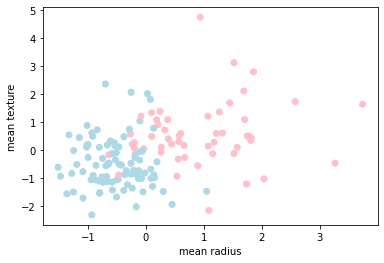

In [9]:
x_0 = []
for obs in x_test:
    x_0.append(obs[0])

x_1 = []
for obs in x_test:
    x_1.append(obs[1])
    
color = []
for obs in range(len(pred)):
    if pred[obs] == 1:
        color.append('lightblue')
    else:
        color.append('pink')

plt.scatter(x_0,x_1,c=color)
plt.xlabel(str(data.feature_names[0]))
plt.ylabel(str(data.feature_names[1]))

#Si el color es rosado, entonces estamos hablado de los tumores malignos

Text(0, 0.5, 'mean area')

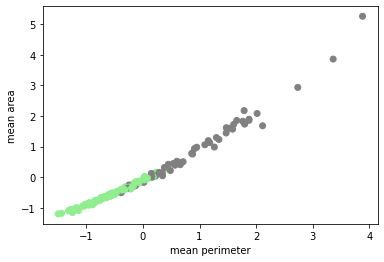

In [10]:
x_2 = []
for obs in x_test:
    x_2.append(obs[2])

x_3 = []
for obs in x_test:
    x_3.append(obs[3])
    
color = []
for obs in range(len(pred)):
    if pred[obs] == 1:
        color.append('lightgreen')
    else:
        color.append('gray')

plt.scatter(x_2,x_3,c = color)
plt.xlabel(str(data.feature_names[2]))
plt.ylabel(str(data.feature_names[3]))

#Si el color es gris, entonces estamos hablado de los tumores malignos

Text(0, 0.5, 'mean compactness')

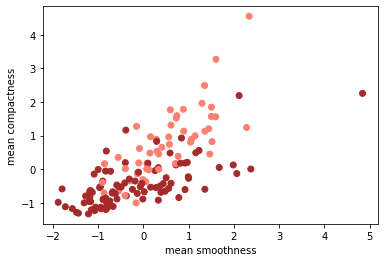

In [11]:
x_4 = []
for obs in x_test:
    x_4.append(obs[4])

x_5 = []
for obs in x_test:
    x_5.append(obs[5])
    
color = []
for obs in range(len(pred)):
    if pred[obs] == 1:
        color.append('brown')
    else:
        color.append('salmon')

plt.scatter(x_4,x_5,c = color)
plt.xlabel(str(data.feature_names[4]))
plt.ylabel(str(data.feature_names[5]))

#Si el color es salmon, entonces estamos hablado de los tumores malignos

4. Analice los valores del parametro $\theta$ del clasificador, grafiquelos y comparelos con los datos disponibles.



In [17]:
theta =clasificacion.coef_
print(theta)

[[-0.41061039 -0.33615762 -0.4132232  -0.49563868 -0.1850283   0.48322836
  -0.83583774 -1.01010643  0.20554034  0.25389922 -0.98932963  0.20653151
  -0.40650637 -0.76102401 -0.25701863  0.55084699  0.15256624 -0.08867246
   0.19220218  0.54966822 -0.97554181 -1.18462375 -0.80857507 -0.91527215
  -0.71773226 -0.07403005 -0.75884403 -0.82683111 -0.85413201 -0.29898076]]


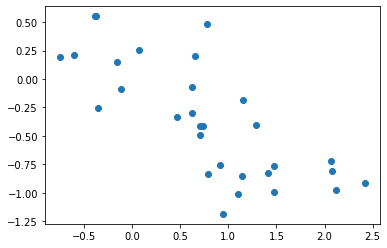

In [14]:
theta =clasificacion.coef_
theta_param = []
for i in  theta:
    for j in i:
        theta_param.append(j)
plt.scatter(x_train[0],theta_param) 

Consideramos que el punto más alto de la gráfica es el que representa la variable más importante a cosniderar dado el valor que tiene su parámetro $\theta$. Además, según la predicción del clasificador, este caso a considerar se considera _Benigno_

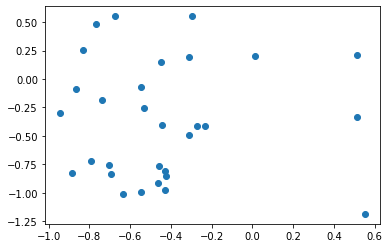

In [16]:
plt.scatter(x_train[6],theta_param)   

Por otro lado, el caso seleccionado, se considera _Maligno_ . Note que los valores de $\theta$ con respecto a los parámetros del train, tienden a ser negativos la mayoria.

De esta manera, podemos decir que se puede clasificar como _benigno_ o _maligno_ dependiendo del comportamiento que tiene los valores. 

## Preguntas
Como el objetivo es evaluar sus conocimientos en clasificación, el profesor Alexander también quiere que contesten las siguientes preguntas:

1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN?

- Dado que es un algoritmo que sirve para predecir, clasifica los valores K, teniendo en cuenta los puntos de datos mas cercanos a 1. De esta manera, clasifica el punto adecuado basándose en sus puntos vecinos. Luego, los valores más altos es donde se logra obtener la mayor precisión.

2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logistica? ¿Funciona uno mejor que otro?, ¿Porqué?

- La Regresón Logistica es un modelo paramétrico, mientras que el algortimos de KNN no lo es, es decir, la regresión logistica tiene una familia de distribuciones de probabilidad con un número finito de parámetros. Aunque, esto conlleva a que si la muestra es muy grande, el algortimo tardaría mucho y el costo sería alto. Luego, en términos de velocidad, el clasificador KNN es mucho más lento que la Regresión Logistica. Ahora bien, acerca de la predicción, ambas tienen una predicción muy acertada en este caso. Sin embargo, la Regresión Logística tiene mejor pronóstico. 

3. ¿El clasificador de regresión logistica presenta un buen rendimiento? ¿Cómo evaluan su rendimiento?¿Si el rendimiento no es bueno que cree se debe hacer para mejorarlo?

- En términos de rendimiento, la regresión logistica es muy eficaz y sencilla de utilizar. El buen rendimiento de la regresión logistica se debe también a que el clasificador toma una decisión con base a la existencia de una u otra característica en su propio registro. Su rendimiento se evalúa al no necesitar grandes recursos computacionales.


4. ¿Qué relación tienen los parámetros $\theta$ con los datos disponibles para cada clase? ¿Esto le genera alguna idea sobre como se pueden inicializar los valores para este clasificador?

- Los valores que tiene $\theta_i$ define cada dato por considerar. Si se compara el comportamineto de un dato negativo con uno positivo, se pueden ver cuales son los valores ($\theta_i$) más importantes o que más peso tiene a la hora de definir si la persona se encuentra enferma o no.  Si se define un umbral como base, podemos clasificar cuales personas podrían estar enfermas. 

5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clasificación y como se aplicó en este proyecto.
-  Particularmente en este proyecto, la regresión logística abre las puertas para lograr clasificar las enfermedades de una manera rápida lo cual es algo muy bueno, dado que así se podría evitar el gasto en muchos exámenes médicos y en lo más importante, el tiempo, para lograr una diagnóstico completo y así un tratamiento. Respecto a los métodos de clasificación, se le puede sacar mucho provecho y más que todo en el área de la salud.  



**Referencias**
- https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/#:~:text=K%2DNearest%2DNeighbor%20es%20un,el%20mundo%20del%20Aprendizaje%20Autom%C3%A1tico.
- https://www.analyticslane.com/2018/07/23/la-regresion-logistica/
- https://www.iartificial.net/regresion-logistica-para-clasificacion/
- https://web.stanford.edu/class/archive/cs/cs109/cs109.1178/lectureHandouts/220-logistic-regression.pdf


    